## Wczytanie potrzebnych bibliotek

In [23]:
import pandas as pd
import numpy as np
import os, re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display

Automatyczne wyszukiwanie dysku przenośnego potrzbenego do ścieżki do pliku z danymi

In [2]:
discks_names =  re.findall(r"[A-Z]+:.*$",os.popen("mountvol /").read(),re.MULTILINE)

a = []
for i in range(len(discks_names)):
    b = discks_names[i].split(":")[0]
    a.append(b)

dics = a['C' in a]

dics

'D'

## Wczytanie oraz prezentacja zbioru danych

In [24]:
pd.options.display.max_columns = None
loc = dics + ":/data_football/laliga/"
file = "laliga_final_log"
dataset = pd.read_csv(loc + file+ '.csv', index_col = 0)
dataset.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,MW,HomeTeamLP,AwayTeamLP,Sezon,HT_LP,AT_LP,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP,H2H_Home,H2H_Away,H2H_Home_pts,H2H_Away_pts,temp,Off_H,Off_A,Deff_H,Deff_A,Mean_home_goals,Mean_away_goals
3755,2019-04-24,Espanol,Celta,1.0,1.0,D,39.0,47.0,48.0,56.0,42,35,D,W,W,D,L,W,L,W,D,W,34,11.0,13.0,19,10,15,DWWDL,WLWDW,8.0,10.0,0,0,0,0,0,0,0,0,-9.0,-9.0,7,-2.0,-2.0,WDD,LDD,5,2,376,0.965517,1.000000,1.000000,1.000000,1.400000,1.240000
3756,2019-04-24,Levante,Betis,4.0,0.0,H,48.0,39.0,61.0,46.0,34,43,D,L,D,L,D,L,L,W,L,D,34,15.0,6.0,19,16,9,DLDLD,LLWLD,3.0,4.0,0,0,0,0,0,0,0,0,-13.0,-7.0,-9,-1.0,9.0,LLW,WWL,3,6,376,0.965517,1.000000,1.000000,1.000000,1.400000,1.240000
3757,2019-04-25,Sevilla,Vallecano,NaN,NaN,NaN,50.0,35.0,41.0,53.0,52,28,L,W,W,W,L,D,L,W,L,D,34,7.0,16.0,19,5,19,LWWWL,DLWLD,9.0,5.0,0,0,0,0,0,0,0,0,9.0,-18.0,24,4.0,-9.0,WDW,LDL,7,1,376,1.655172,1.000000,1.000000,1.000000,2.400000,1.240000
3758,2019-04-25,Sociedad,Villarreal,NaN,NaN,NaN,37.0,41.0,40.0,44.0,41,36,L,D,L,W,D,W,W,L,D,L,34,12.0,5.0,19,11,14,LDLWD,WWLDL,5.0,7.0,0,0,0,0,0,0,0,0,-3.0,-3.0,5,-2.0,7.0,WLW,LWL,6,3,376,0.965517,0.816327,1.000000,0.858896,1.202454,1.012245
3759,2019-04-25,Getafe,Real Madrid,NaN,NaN,NaN,43.0,57.0,27.0,38.0,54,64,W,D,W,D,L,W,D,W,L,W,34,8.0,3.0,19,4,3,WDWDL,WDWLW,8.0,10.0,0,0,0,0,0,0,0,0,16.0,19.0,-10,-2.0,5.0,LLL,WWW,0,9,376,1.103448,3.469388,1.428571,0.613497,0.981595,6.145773


Zmienne wykorzystane w zbiorze danych opisanych zostało w:
https://analizadanychwpilce.com/2018/09/15/przewidywanie-wyniku-spotkania-z-wykorzystaniem-regresji-logistycznej/
oraz
https://analizadanychwpilce.com/2019/02/03/przewidywany-wynik-na-podstawie-rozkladu-poissona/

Wyrzucenie wierszy w których brak danych dla odpowiednich ze zmiennych

In [4]:
dataset = dataset.loc[(dataset["HM1"] != "M") &  (dataset["AM1"] != "M")  & (dataset["AM2"] != "M")  &
                      (dataset["HM2"] != "M")  & (dataset["HM3"] != "M") & (dataset["AM3"] != "M")  ]

## Dodanie dodatkowych zmiennych

### Dane dotyczące wartości drużyny

In [5]:
pd.options.display.max_columns = None
marketv = pd.read_csv(loc + 'budget_laliga_final.csv', index_col = 0)

marketv.Sezon = marketv.Sezon.astype(str).str[2:]
marketv["Sezon"] = marketv["Sezon"].astype(int) + 1

dataset = pd.merge(dataset, marketv,  how='inner', left_on=['HomeTeam','Sezon'], 
                       right_on = ['Club','Sezon'], sort=False)

dataset = dataset.rename(columns={'Age': 'Age_H', 'Foreign': 'Foreign_H',
                             'Total_value': 'Total_value_H', 'Market_value': 'Market_value_H'})

dataset = pd.merge(dataset, marketv,  how='inner', left_on=['AwayTeam','Sezon'], 
                       right_on = ['Club','Sezon'], sort=False)

dataset = dataset.rename(columns={'Age': 'Age_A', 'Foreign': 'Foreign_A',
                                'Total_value': 'Total_value_A', 'Market_value': 'Market_value_A'})

dataset.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,Club_x,Age_H,Foreign_H,Total_value_H,Market_value_H,Club_y,Age_A,Foreign_A,Total_value_A,Market_value_A
4155,2018-09-29,Real Madrid,Ath Madrid,0.0,0.0,D,10.0,7.0,6.0,3.0,...,Real Madrid,26.5,4,969.0,40.38,Ath Madrid,27.2,5,807.0,40.35
4156,2018-10-20,Villarreal,Ath Madrid,1.0,1.0,D,6.0,9.0,6.0,4.0,...,Villarreal,28.7,15,196.1,7.84,Ath Madrid,27.2,5,807.0,40.35
4157,2019-02-03,Betis,Ath Madrid,1.0,0.0,H,26.0,31.0,23.0,13.0,...,Betis,27.8,15,180.5,8.60,Ath Madrid,27.2,5,807.0,40.35
4158,2019-04-06,Barcelona,Ath Madrid,2.0,0.0,H,78.0,44.0,31.0,20.0,...,Barcelona,26.8,13,1100.0,49.72,Ath Madrid,27.2,5,807.0,40.35
4159,2019-03-30,Alaves,Ath Madrid,0.0,4.0,A,31.0,42.0,32.0,18.0,...,Alaves,26.2,14,59.4,2.48,Ath Madrid,27.2,5,807.0,40.35


Dodatkowe zmienne to Age_H ora Age_A, czyli średni wiek zawodników w drużynie odpowiednio gospdoarzy i gości.
Foreign_H oraz Foreign_A to ilośc zawodników zagrancizncyh w drużynie odpowiednio gospdoarzy i gości.
Total_value_H oraz Total_value_A czyli wartość pierwszego zespołu odpowiednio goposdarzy i gości.
Market_value_H oraz Market_value_A czyli wartość rynkowa drużyny odpowiednio goposdarzy i gości.

Stworzenie zmiennej wynikowej 'draw'

In [6]:
df_final = dataset
warnings.simplefilter('ignore')
df_final['draw'] = np.where(df_final['FTR']=='D', 1, 0)

Zmienna 'draw' przyjmuje wartość 1 w przypadku remisu, 0 w przeciwym wypadku

## Modyfikacja wbranych kolumn

### Konwersja wybranych kolumn do typu kategorycznego

Wystarczy konwersja za pomoca .astype(), gdyż wszystkie wybrane zmienne przyjmują wyłącznie dwie kategorie.( 

In [7]:
warnings.simplefilter('ignore')
cols_cat = [ 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1',
       'AM2', 'AM3', 'AM4', 'AM5', 'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3',
       'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3',
       'ATLossStreak5', 'draw']
df_final[cols_cat] = df_final[cols_cat].astype('category')

### Przegląd danych

In [8]:
df_final.describe()

,FTHG,FTAG,HTGS,ATGS,HTGC,ATGC,HTP,ATP,MW,HomeTeamLP,...,Mean_home_goals,Mean_away_goals,Age_H,Foreign_H,Total_value_H,Market_value_H,Age_A,Foreign_A,Total_value_A,Market_value_A
count,4157.000000,4157.000000,4160.000000,4160.000000,4160.00000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,...,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000
mean,1.627857,1.130864,26.925240,27.207933,27.18149,26.925240,27.290385,27.684375,20.852163,10.047356,...,1.575990,1.129107,25.059447,8.516106,155.689014,5.011197,25.061562,8.517308,155.112969,4.999331
std,1.363565,1.176323,18.345956,18.510728,16.09453,15.883894,17.611017,17.815696,10.031258,5.190427,...,0.920874,0.553381,1.132740,5.272861,187.164221,6.531338,1.133098,5.294927,187.808292,6.570286
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,1.000000,...,0.000000,0.000000,22.700000,1.000000,21.100000,0.810000,22.700000,1.000000,21.100000,0.810000
25%,1.000000,0.000000,13.000000,13.000000,14.00000,14.000000,13.000000,14.000000,12.000000,5.000000,...,1.000000,0.934420,24.300000,4.000000,55.562500,1.750000,24.300000,4.000000,55.150000,1.750000
50%,1.000000,1.000000,24.000000,24.000000,25.00000,25.000000,25.000000,25.000000,21.000000,10.000000,...,1.400000,1.110000,24.900000,7.000000,73.200000,2.290000,24.900000,7.000000,73.200000,2.290000
75%,2.000000,2.000000,36.000000,37.000000,39.00000,39.000000,37.000000,38.000000,29.250000,16.000000,...,2.000000,1.252867,25.700000,12.000000,170.100000,5.280000,25.700000,12.000000,170.100000,5.280000
max,10.000000,8.000000,117.000000,115.000000,88.00000,89.000000,97.000000,94.000000,38.000000,18.000000,...,9.395973,9.666667,28.700000,26.000000,1100.000000,49.720000,28.700000,26.000000,1100.000000,49.720000


Wyszukanie braków danych

In [9]:
df_final.describe().loc['count',:] < len(df_final)

FTHG                True
FTAG                True
HTGS               False
ATGS               False
HTGC               False
ATGC               False
HTP                False
ATP                False
MW                 False
HomeTeamLP         False
AwayTeamLP         False
Sezon              False
HT_LP              False
AT_LP              False
HTFormPts           True
ATFormPts           True
HTGD               False
ATGD               False
DiffPts            False
DiffFormPts         True
DiffLP             False
H2H_Home_pts       False
H2H_Away_pts       False
temp               False
Off_H              False
Off_A              False
Deff_H             False
Deff_A             False
Mean_home_goals    False
Mean_away_goals    False
Age_H              False
Foreign_H          False
Total_value_H      False
Market_value_H     False
Age_A              False
Foreign_A          False
Total_value_A      False
Market_value_A     False
Name: count, dtype: bool

Zmienne HTFormPts oraz ATFormPts posiadają znacznie mniej wartości niż pozostałe kolumny. 
Z tego powodu należy uzupełnić te kolumny.

### Uzupełnienie braków danych

Uzupełnienie braków danych wartością mediany w wybranych kolumnach

In [10]:
df_final.HTFormPts = df_final.HTFormPts.fillna(df_final.HTFormPts.median())
df_final.ATFormPts = df_final.ATFormPts.fillna(df_final.ATFormPts.median())
df_final.DiffFormPts = df_final.DiffFormPts.fillna(df_final.DiffFormPts.median())

### Stworzenie nowych zmiennych

In [11]:
df_final["H2H_Diff"] = df_final["H2H_Home_pts"] - df_final["H2H_Away_pts"]
df_final["Market_Diff"] = df_final["Market_value_H"] / df_final["Market_value_A"]
df_final["Total_Diff"] = df_final["Total_value_H"] / df_final["Total_value_A"]
df_final["Age_diff"] = df_final["Age_H"] - df_final["Age_A"]
df_final["LP_Diff"] = df_final["HT_LP"] - df_final["AT_LP"]

### Wybranie wybranych kolumn w zbiorze danych

In [12]:
df_final = df_final[[ 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1',
       'AM2', 'AM3', 'AM4', 'AM5', 
        'MW',  'HT_LP', 'AT_LP',    'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3',
       'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3',
       'ATLossStreak5', 'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts', 'DiffLP',
          'H2H_Home_pts', 'H2H_Away_pts', 'Mean_home_goals', 'Mean_away_goals',
        'Total_value_H',   'Total_value_A',      'H2H_Diff', 'Market_Diff', 
        'Total_Diff', 'Age_diff', 'LP_Diff', 'draw']]


df_final.tail()

,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,...,Mean_home_goals,Mean_away_goals,Total_value_H,Total_value_A,H2H_Diff,Market_Diff,Total_Diff,Age_diff,LP_Diff,draw
4155,13,11,L,W,D,W,W,W,W,D,...,6.315789,0.852805,969.0,807.0,0,1.000743,1.200743,-0.7,-2,1
4156,8,15,L,L,W,D,W,W,D,W,...,1.190840,1.020175,196.1,807.0,6,0.194300,0.242999,1.5,13,1
4157,29,44,L,W,L,L,D,W,W,W,...,1.600000,1.150000,180.5,807.0,-6,0.213135,0.223668,0.6,6,0
4158,70,62,D,W,W,W,W,W,W,L,...,2.352941,1.144231,1100.0,807.0,3,1.232218,1.363073,-0.4,-1,0
4159,44,56,W,D,W,D,D,L,W,W,...,0.784314,0.605505,59.4,807.0,-9,0.061462,0.073606,-1.0,3,0


### Konwersja wybranych kolumn do typu integer

In [14]:
cols_to_int = ["MW", "DiffFormPts", "DiffLP", "HTGD",  "ATGD",  "HT_LP", "AT_LP", "HTP", "ATP",  "H2H_Home_pts", "H2H_Away_pts"]
df_final[cols_to_int] = df_final[cols_to_int].astype('int')

### Dodanie dodatkowych zmiennych binarnych

In [15]:
df_final['HM1_Draw'] = np.where(df_final['HM1']=='D', 1, 0)
df_final['HM2_Draw'] = np.where(df_final['HM2']=='D', 1, 0)
df_final['AM1_Draw'] = np.where(df_final['AM1']=='D', 1, 0)
df_final['AM2_Draw'] = np.where(df_final['AM2']=='D', 1, 0)

# Eksploracja danych

## Typ zmiennych, ilość wartości  

In [16]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4160 entries, 0 to 4159
Data columns (total 44 columns):
HTP                4160 non-null int32
ATP                4160 non-null int32
HM1                4160 non-null category
HM2                4160 non-null category
HM3                4160 non-null category
HM4                4160 non-null category
HM5                4160 non-null category
AM1                4160 non-null category
AM2                4160 non-null category
AM3                4160 non-null category
AM4                4160 non-null category
AM5                4160 non-null category
MW                 4160 non-null int32
HT_LP              4160 non-null int32
AT_LP              4160 non-null int32
HTWinStreak3       4160 non-null category
HTWinStreak5       4160 non-null category
HTLossStreak3      4160 non-null category
HTLossStreak5      4160 non-null category
ATWinStreak3       4160 non-null category
ATWinStreak5       4160 non-null category
ATLossStreak3      4160 no

Zmiennych jest 44... Zdecydowanie za dużo. Sam fakt posiadania tak wielu zmiennych będzie znacznie utrudniał eksploracje, a nastepnie późniejsze tworzenie modelu.

## Zmienna wynikowa 'draw'

In [17]:
df_final.draw.value_counts()

0    3218
1     942
Name: draw, dtype: int64

In [18]:
warnings.simplefilter('ignore')
df_final.groupby('draw').mean() 

,HTP,ATP,MW,HT_LP,AT_LP,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP,...,Total_value_A,H2H_Diff,Market_Diff,Total_Diff,Age_diff,LP_Diff,HM1_Draw,HM2_Draw,AM1_Draw,AM2_Draw
draw,,,,,,,,,,,,,,,,,,,,,
0,27.813549,27.653201,20.851771,10.185830,10.208204,0.664699,0.247669,0.160348,-0.203543,-0.416097,...,155.372004,-0.196706,2.195623,2.260934,-0.034027,-0.022374,0.230578,0.234929,0.222188,0.228403
1,25.503185,27.790870,20.853503,11.544586,10.242038,-3.402335,0.402335,-2.287686,-0.945860,1.169851,...,154.228068,-0.436306,1.459853,1.461521,0.106900,1.302548,0.213376,0.236730,0.250531,0.194268


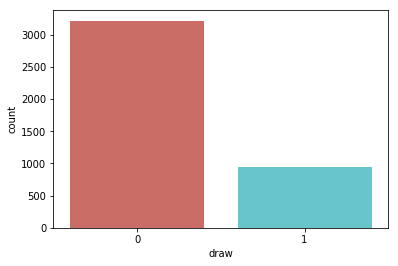

In [19]:
sns.countplot(x='draw', data=df_final , palette = "hls")
plt.show()

In [21]:
count_no_sub = len(df_final[df_final['draw']==0])
count_sub = len(df_final[df_final['draw']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("Percentage of no draws is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("Percentage of draws", pct_of_sub*100)

percentage of no draws is 77.35576923076923
percentage of draws 22.64423076923077


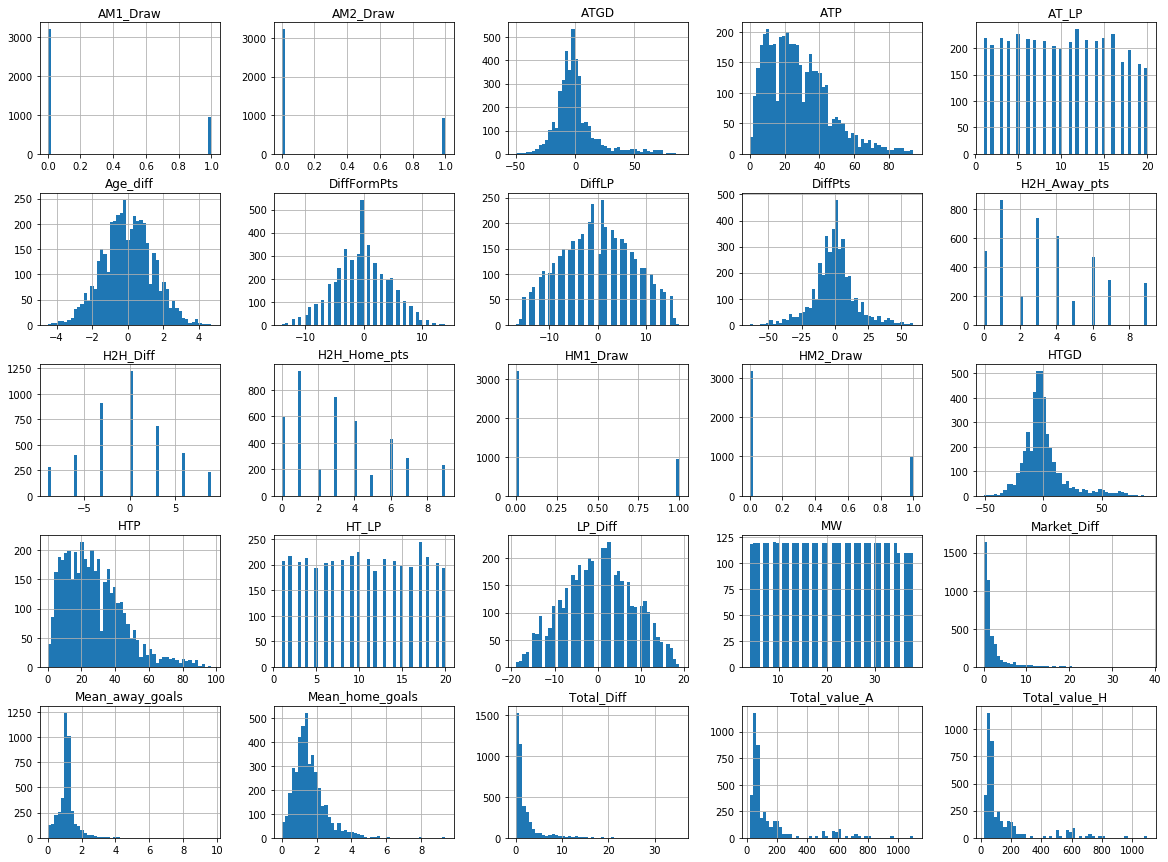

In [22]:
df_final.hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A4DC6187B8>,
      dtype=object)

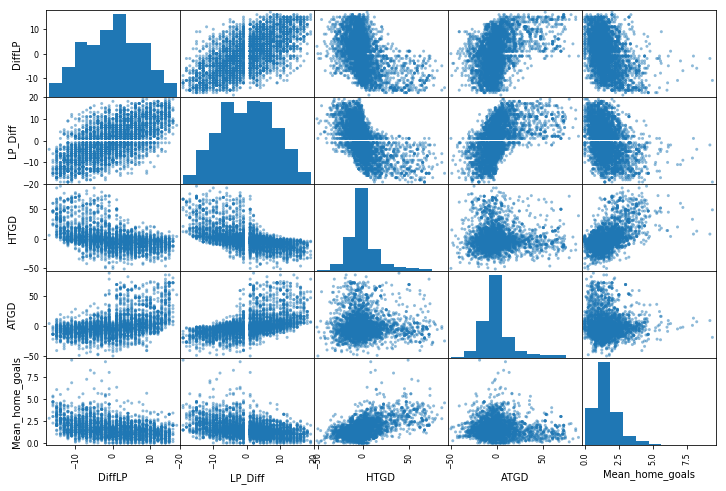

In [27]:
from pandas.tools.plotting import scatter_matrix
attributes = ["DiffLP", "LP_Diff", "HTGD", "ATGD", 
                     "Mean_home_goals"]
scatter_matrix(df_final[attributes], figsize=(12, 8))

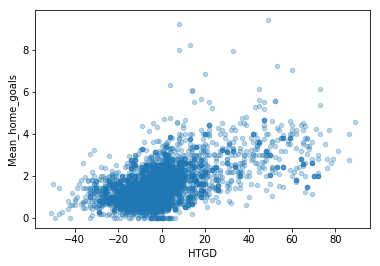

In [28]:
df_final.plot(kind="scatter", x="HTGD", y="Mean_home_goals",      alpha=0.3)

### Modyfikacja zmiennych które rosną wraz z kolejkami

In [25]:
df_final["HTGD_by_MW"] = df_final["HTGD"] / df_final["MW"] 
df_final["ATGD_by_MW"] = df_final["ATGD"] / df_final["MW"] 
df_final["HTP_by_MW"] = df_final["HTP"] / df_final["MW"] 
df_final["ATP_by_MW"] = df_final["ATP"] / df_final["MW"] 

df_final["Goals_mean_diff"] = df_final["Mean_home_goals"] - df_final["Mean_away_goals"]

# Korelacja zmiennych

In [34]:
cols_selected = ['HT_LP', 'AT_LP', 
       'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5',
       'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts', 'DiffFormPts', 'DiffLP', 'H2H_Home_pts',
       'H2H_Away_pts', 'Mean_home_goals',
       'Mean_away_goals', 'Total_value_H', 'Total_value_A', 'H2H_Diff',
       'Market_Diff', 'Total_Diff', 'Age_diff', 'LP_Diff', 'draw', 'HM1_Draw',
       'HM2_Draw', 'AM1_Draw', 'AM2_Draw', 'HTGD_by_MW', 'ATGD_by_MW', "H2H_Home_pts", "H2H_Away_pts", 
       'Goals_mean_diff']

df_final = df_final[cols_selected]
corr_matrix = df_final.corr()
corr_matrix[(corr_matrix>0.8) | (corr_matrix< -0.8) ]

,HT_LP,AT_LP,DiffPts,DiffFormPts,DiffLP,H2H_Home_pts,H2H_Away_pts,Mean_home_goals,Mean_away_goals,H2H_Diff,Total_Diff,Age_diff,LP_Diff,HM1_Draw,HM2_Draw,AM1_Draw,AM2_Draw,HTGD_by_MW,ATGD_by_MW,Goals_mean_diff
HT_LP,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.852117,NaN,NaN
AT_LP,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.847128,NaN
DiffPts,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.845129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DiffFormPts,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DiffLP,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H2H_Home_pts,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.876546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H2H_Away_pts,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,-0.881308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mean_home_goals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.882361
Mean_away_goals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H2H_Diff,NaN,NaN,NaN,NaN,NaN,0.876546,-0.881308,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Usuniecie wysoce skorelowanych zmiennych ze soba

In [38]:
cols_selected = ['HT_LP', 'AT_LP', 
       'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5',
       'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts', 'DiffFormPts', 'DiffLP',
       'Mean_away_goals',  'H2H_Diff',
         'Total_Diff', 'Age_diff', 'LP_Diff', 'draw', 'HM1_Draw',
       'HM2_Draw', 'AM1_Draw', 'AM2_Draw', 'HTGD_by_MW', 'ATGD_by_MW',"H2H_Home_pts", "H2H_Away_pts", 
       'Goals_mean_diff']
df_final = df_final[cols_selected]
corr_matrix = df_final.corr()
corr_matrix[(corr_matrix>0.85) | (corr_matrix< -0.85) ]

,HT_LP,AT_LP,DiffPts,DiffFormPts,DiffLP,Mean_away_goals,H2H_Diff,Total_Diff,Age_diff,LP_Diff,HM1_Draw,HM2_Draw,AM1_Draw,AM2_Draw,HTGD_by_MW,ATGD_by_MW,Goals_mean_diff
HT_LP,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.852117,NaN,NaN
AT_LP,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DiffPts,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DiffFormPts,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DiffLP,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mean_away_goals,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H2H_Diff,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Diff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age_diff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LP_Diff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
data_final = df_final
data_final.tail()

,HT_LP,AT_LP,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,DiffPts,DiffFormPts,DiffLP,H2H_Home_pts,H2H_Away_pts,Mean_home_goals,Mean_away_goals,Total_value_H,Total_value_A,H2H_Diff,Market_Diff,Total_Diff,Age_diff,LP_Diff,draw,HM1_Draw,HM2_Draw,AM1_Draw,AM2_Draw,HTGD_by_MW,ATGD_by_MW,Goals_mean_diff
4155,2,4,0,0,0,0,0,0,0,0,2,0,1,3,3,6.315789,0.852805,969.0,807.0,0,1.000743,1.200743,-0.7,-2,1,0,0,0,0,0.571429,0.571429,5.462984
4156,16,3,0,0,0,0,0,0,0,0,-7,-4,3,7,1,1.190840,1.020175,196.1,807.0,6,0.194300,0.242999,1.5,13,1,0,0,0,1,0.000000,0.555556,0.170664
4157,8,2,0,0,0,0,0,0,0,0,-15,-9,4,1,7,1.600000,1.150000,180.5,807.0,-6,0.213135,0.223668,0.6,6,0,0,0,0,0,0.136364,0.818182,0.450000
4158,1,2,1,0,0,0,0,0,0,0,8,1,-1,5,2,2.352941,1.144231,1100.0,807.0,3,1.232218,1.363073,-0.4,-1,0,1,0,0,0,1.516129,0.774194,1.208710
4159,5,2,0,0,0,0,1,0,0,0,-12,-3,12,0,9,0.784314,0.605505,59.4,807.0,-9,0.061462,0.073606,-1.0,3,0,0,1,0,0,-0.034483,0.827586,0.178809


# Over-sampling z wykorzystaniem SMOTE

With our training data created, I’ll up-sample the no-subscription using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:
    Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
    Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.
We are going to implement SMOTE in Python.

In [39]:
X = data_final.loc[:, data_final.columns != 'draw']
y = data_final.loc[:, data_final.columns == 'draw']

In [40]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

In [41]:
os_data_X, os_data_y = os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['draw'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no draw in oversampled data",len(os_data_y[os_data_y['draw']==0]))
print("Number of draws",len(os_data_y[os_data_y['draw']==1]))
print("Proportion of no draws data in oversampled data is ",len(os_data_y[os_data_y['draw']==0])/len(os_data_X))
print("Proportion of draws data in oversampled data is ",len(os_data_y[os_data_y['draw']==1])/len(os_data_X))

length of oversampled data is  4518
Number of no draw in oversampled data 2259
Number of draws 2259
Proportion of no draws data in oversampled data is  0.5
Proportion of draws data in oversampled data is  0.5


Now we have a perfect balanced data! 
You may have noticed that I over-sampled only on the training data, because by oversampling only on the training data, 
none of the information in the test data is being used to create synthetic observations, therefore,
no information will bleed from test data into the model training.

In [42]:
os_data_X.tail()

,HT_LP,AT_LP,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,DiffPts,DiffFormPts,DiffLP,H2H_Home_pts,H2H_Away_pts,Mean_home_goals,Mean_away_goals,Total_value_H,Total_value_A,H2H_Diff,Market_Diff,Total_Diff,Age_diff,LP_Diff,HM1_Draw,HM2_Draw,AM1_Draw,AM2_Draw,HTGD_by_MW,ATGD_by_MW,Goals_mean_diff
4513,7.460516,2.327307,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,-3.902951,0.000000,11.212178,0.442436,8.115129,0.135167,2.283222,62.549096,602.055850,-7.672693,0.115642,0.103895,0.447860,5.133209,0.557564,0.557564,0.00000,0.000000,0.330019,1.669077,-2.148055
4514,6.910712,17.821423,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,18.357153,4.464270,-11.553559,2.089288,4.553559,2.143520,0.780114,110.500000,48.483925,-2.464270,2.760594,2.279242,-0.335715,-10.910712,0.910712,0.910712,1.00000,0.089288,-0.091953,-0.741533,1.363406
4515,3.941090,19.764361,0.0,0.0,0.0,0.0,0.05891,0.0,0.0,0.0,13.648007,4.882181,-11.058910,3.117819,2.941090,1.282474,1.063535,178.100000,66.446249,0.176729,2.538117,2.683764,0.317673,-15.823271,0.000000,0.000000,0.05891,0.000000,0.554737,-0.856161,0.218939
4516,10.000000,1.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,-48.000000,-5.000000,15.000000,0.000000,3.000000,1.400000,1.160000,27.300000,561.100000,-3.000000,0.050121,0.048654,1.900000,9.000000,0.000000,1.000000,0.00000,0.000000,-0.277778,2.000000,0.240000
4517,4.036539,5.036539,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,2.222596,1.408653,4.000000,3.000000,3.777404,2.232342,0.995236,145.618269,178.760794,-0.777404,0.749559,0.814600,-0.944519,-1.000000,0.000000,0.000000,0.00000,0.000000,0.689924,0.319491,1.237105


In [44]:
cols = ['HT_LP', 'AT_LP', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5', 'DiffPts',
       'DiffFormPts', 'DiffLP',  'H2H_Diff']
os_data_X[cols] = os_data_X[cols].round(0)

# Wybór zmiennych

Recursive Feature Elimination
Recursive Feature Elimination (RFE) is based on the idea to repeatedly 
construct a model and choose either the best or worst performing feature, 
setting the feature aside and then repeating the process with the rest of the features. 
This process is applied until all features in the dataset are exhausted. 
The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [64]:
data_final_vars=data_final.columns.values.tolist()
y=['draw']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = 'lbfgs')

rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
#print(rfe.support_)
#print(rfe.ranking_)

mask = pd.Series(rfe.support_)
mask.index = os_data_X.columns
mask

HT_LP               True
AT_LP               True
HTWinStreak3        True
HTWinStreak5        True
HTLossStreak3       True
HTLossStreak5       True
ATWinStreak3        True
ATWinStreak5        True
ATLossStreak3       True
ATLossStreak5      False
DiffPts            False
DiffFormPts        False
DiffLP             False
H2H_Home_pts        True
H2H_Away_pts        True
Mean_home_goals    False
Mean_away_goals    False
Total_value_H      False
Total_value_A      False
H2H_Diff            True
Market_Diff         True
Total_Diff          True
Age_diff           False
LP_Diff             True
HM1_Draw            True
HM2_Draw            True
AM1_Draw            True
AM2_Draw            True
HTGD_by_MW          True
ATGD_by_MW         False
Goals_mean_diff    False
dtype: bool

In [65]:
X=os_data_X.loc[:, mask]
y=os_data_y['draw']

# Implementacja modelu regresji logistycznej

In [66]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.670948
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.032     
Dependent Variable: draw             AIC:              6102.6855 
Date:               2019-04-30 15:57 BIC:              6231.0020 
No. Observations:   4518             Log-Likelihood:   -3031.3   
Df Model:           19               LL-Null:          -3131.6   
Df Residuals:       4498             LLR p-value:      2.5957e-32
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
HT_LP             -0.1627   0.1487 -1.0940 0.2740 -0.4541  0.1288
AT_LP              0.1753   0.1487  1.1786 0.2386 -0.1162  0.4668


In [68]:
cols_to_df = ["HTWinStreak5", "HTLossStreak3", "ATWinStreak3", 
             "ATLossStreak3",  "Market_Diff",
             "Total_Diff", "HM1_Draw", "HM2_Draw","AM2_Draw", "HTGD_by_MW",
            ]

X=os_data_X[cols_to_df]
y=os_data_y['draw']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.676143
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.025     
Dependent Variable: draw             AIC:              6129.6291 
Date:               2019-04-30 15:59 BIC:              6193.7873 
No. Observations:   4518             Log-Likelihood:   -3054.8   
Df Model:           9                LL-Null:          -3131.6   
Df Residuals:       4508             LLR p-value:      1.5458e-28
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
HTWinStreak5      -1.1632   0.3924 -2.9643 0.0030 -1.9322 -0.3941
HTLossStreak3     -0.3608   0.1310 -2.7541 0.0059 -0.6176 -0.1040


## Weryfikacja modelu 

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy of logistic regression classifier on test set: 0.55
[[283 413]
 [195 465]]


              precision    recall  f1-score   support

           0       0.59      0.41      0.48       696
           1       0.53      0.70      0.60       660

   micro avg       0.55      0.55      0.55      1356
   macro avg       0.56      0.56      0.54      1356
weighted avg       0.56      0.55      0.54      1356



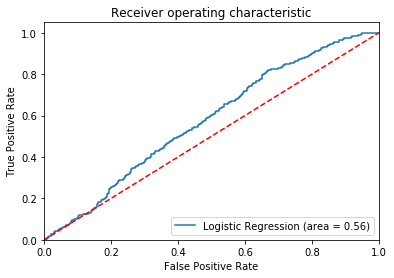

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


# Nowe dane

In [72]:
loc = dics + ":/data_football/laliga/"
file = "predict"
predict = pd.read_csv(loc + 'predict.csv', index_col = 0)
loc_to_functions = dics + ":/data_football/"


import os, re
os.chdir(loc_to_functions)

import functions_to_mlpy as f1


df = f1.dataset_prepering(loc, file)

df = df[cols_to_df ]
y_pred_new = logreg.predict(df)

df = f1.dataset_prepering(loc, file)


final = pd.concat([df[["HomeTeam", "AwayTeam"]].reset_index(drop=True), pd.DataFrame(y_pred_new)], axis=1)
final

,HomeTeam,AwayTeam,0
0,Ath Bilbao,Alaves,0
1,Ath Madrid,Valladolid,0
2,Leganes,Celta,1
3,Barcelona,Levante,0
4,Valencia,Eibar,0
5,Girona,Sevilla,0
6,Sociedad,Getafe,0
7,Villarreal,Huesca,0
8,Vallecano,Real Madrid,1
9,Betis,Espanol,1
